In [1]:
# Dataset is in German so I have provided translations

# ALTER -> Age
# GESCHLECHT -> Gender
# STADTKREIS -> City Quarter or District
# RASSE1 -> Dog's Primary Breed
# RASSE2 -> Dog's Secondary Breed
# GEBURTSJAHR_HUND -> Dog's Year of Birth
# GESCHLECHT_HUND -> Dog's Gender
# HUNDEFARBE -> Dog's Color

In [2]:
import pandas as pd
import numpy as np

# Reading in the data
dogs = pd.read_csv('/home/jake_ockerby/Python/zurich_dogs/zurich_dogs.csv')
dogs

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,NaN,NaN,NaN,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,NaN,NaN,NaN,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
5,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
6,4004,61-70,w,3.0,34.0,Dackel,NaN,NaN,NaN,K,2010,m,braun
7,4050,41-50,w,11.0,111.0,Bichon frisé,NaN,NaN,NaN,K,2012,m,weiss
8,4054,51-60,w,11.0,111.0,Lagotto Romagnolo,NaN,NaN,NaN,I,2016,w,weiss/beige
9,4155,61-70,w,9.0,92.0,Zwergdackel,NaN,NaN,NaN,K,2002,m,schwarz/grau


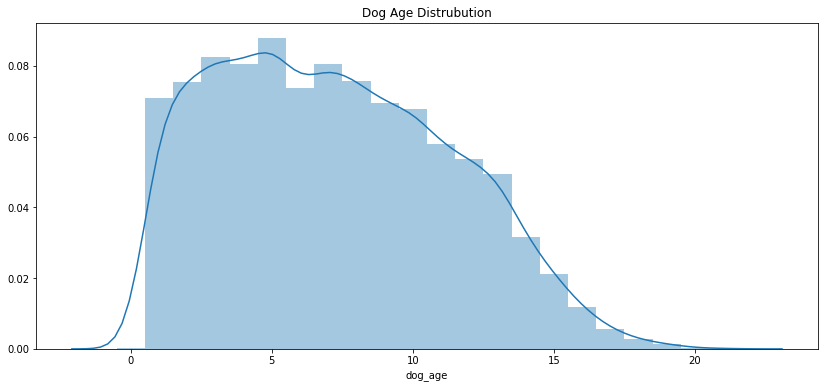

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

dogs.dropna(subset = ["ALTER"], inplace=True) # Dropping the one missing entry in 'ALTER'
# Finding the dogs' ages by subtracting the year born from year data was collected
dogs['dog_age'] = 2017 - dogs['GEBURTSJAHR_HUND']
b = dogs['dog_age'][(dogs['dog_age'] >= 0) & (dogs['dog_age'] <= 25)]

# Plotting the distrubution
plt.figure(figsize=(14,6))
plt.title('Dog Age Distrubution')
plt.xlabel('Age of Dog in Years')
sns.distplot(a=b,hist=True, bins=np.arange(min(b)-0.5, max(b)+1, 1))

Text(0, 0.5, 'Age of Dog in Years')

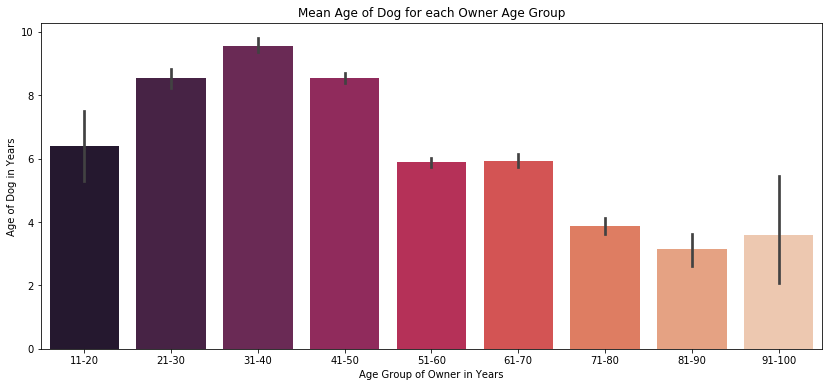

In [5]:
owner = sorted(dogs['ALTER']) # Sorting the owners' ages

plt.figure(figsize=(14,6))
plt.title('Mean Age of Dog for each Owner Age Group')
sns.barplot(x=owner, y=dogs['dog_age'], palette='rocket')

plt.xlabel('Age Group of Owner in Years')
plt.ylabel('Age of Dog in Years')

In [6]:
# Storing some values into variables to use later

over11 = dogs[dogs['ALTER'] == '11-20']
over21 = dogs[dogs['ALTER'] == '21-30']
over31 = dogs[dogs['ALTER'] == '31-40']
over41 = dogs[dogs['ALTER'] == '41-50']
over51 = dogs[dogs['ALTER'] == '51-60']
over61 = dogs[dogs['ALTER'] == '61-70']
over71 = dogs[dogs['ALTER'] == '71-80']
over81 = dogs[dogs['ALTER'] == '81-90']
over91 = dogs[dogs['ALTER'] == '91-100']

twenty = '11-20'
thirty = '21-30'
forty = '31-40'
fifty = '41-50'
sixty = '51-60'
seventy = '61-70'
eighty = '71-80'
ninety = '81-90'
hundred = '91-100'

In [7]:
# Creating a function that draws a bar graph of the most popular dog breeds by age group

def breed_graph(age, age_title):
        age_races = age['RASSE1'].value_counts()
        age_races = age_races/sum(age_races)
        age_races_percent = (age_races*100).head(5)
        plt.figure(figsize=(14,6))
        plt.title('Most Popular Breeds of Dog in Owner Age Group %s' % age_title)
        sns.barplot(x=age_races_percent.index, y=age_races_percent, palette='BuGn_r')
        plt.xlabel('Dog Breed')
        plt.ylabel('Percentage of Dog Population')

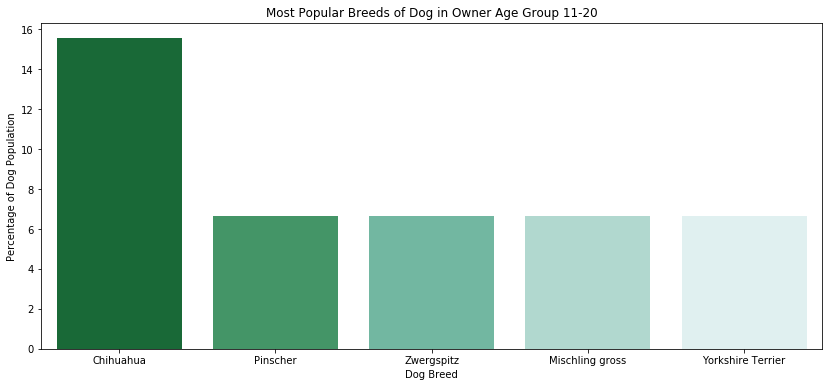

In [8]:
# Passing each age group and correct title into my graph-drawing function
breed_graph(over11, twenty)

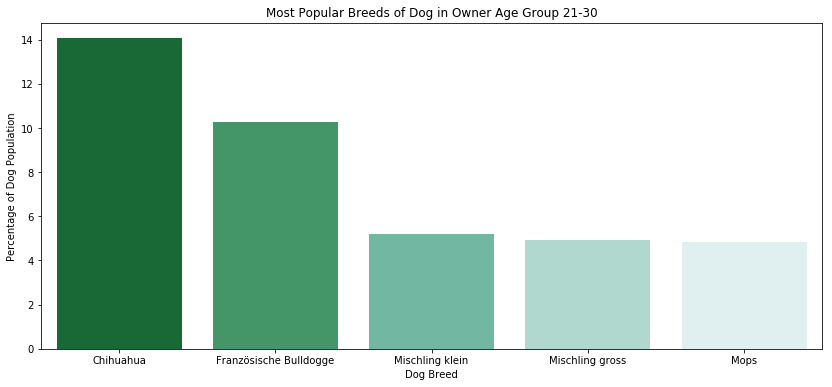

In [9]:
breed_graph(over21, thirty)

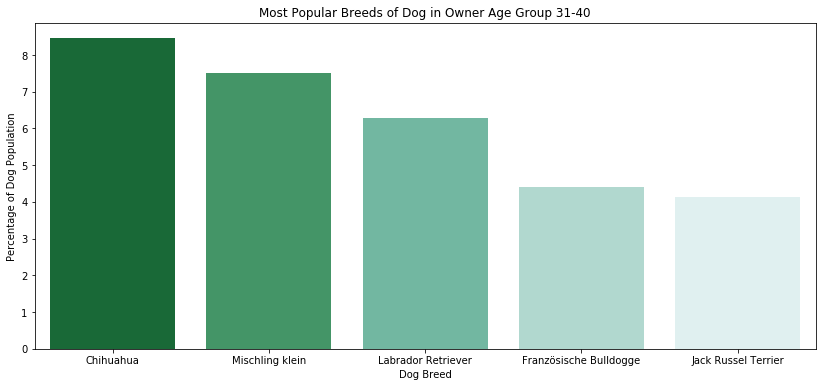

In [10]:
breed_graph(over31, forty)

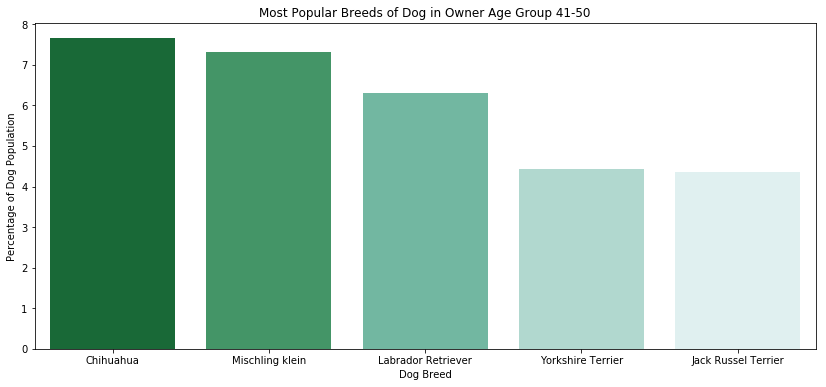

In [11]:
breed_graph(over41, fifty)

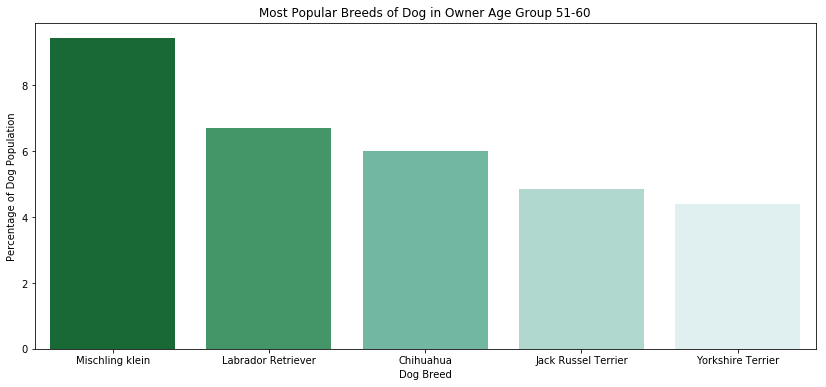

In [12]:
breed_graph(over51, sixty)

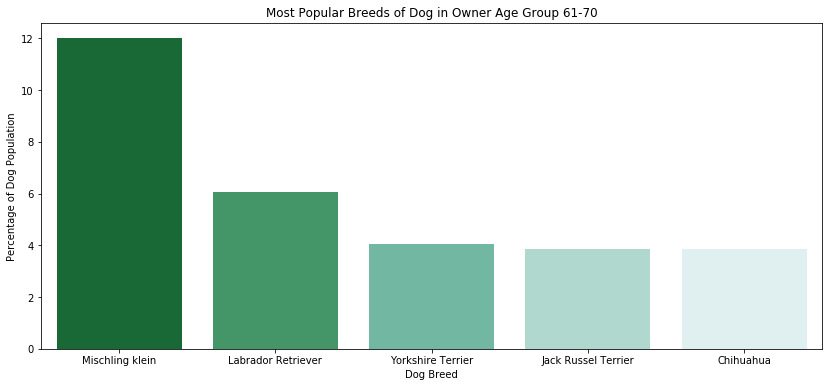

In [13]:
breed_graph(over61, seventy)

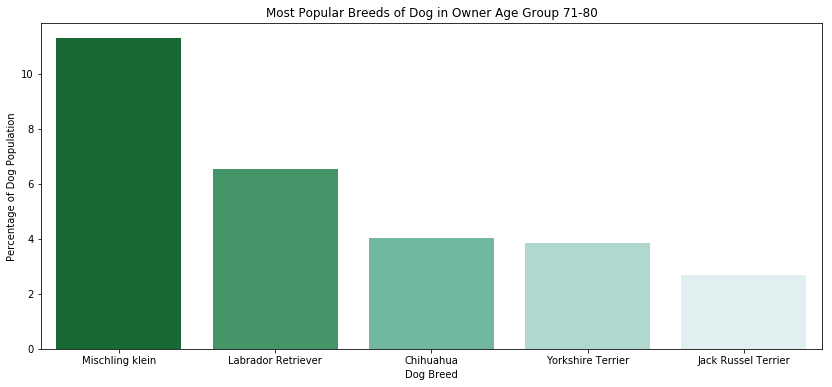

In [14]:
breed_graph(over71, eighty)

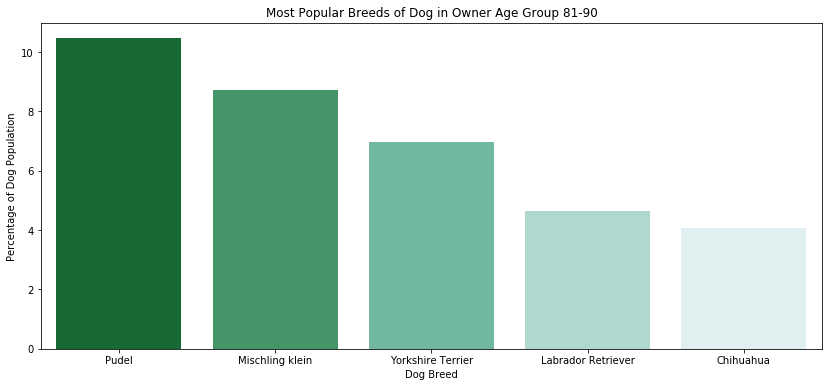

In [15]:
breed_graph(over81, ninety)

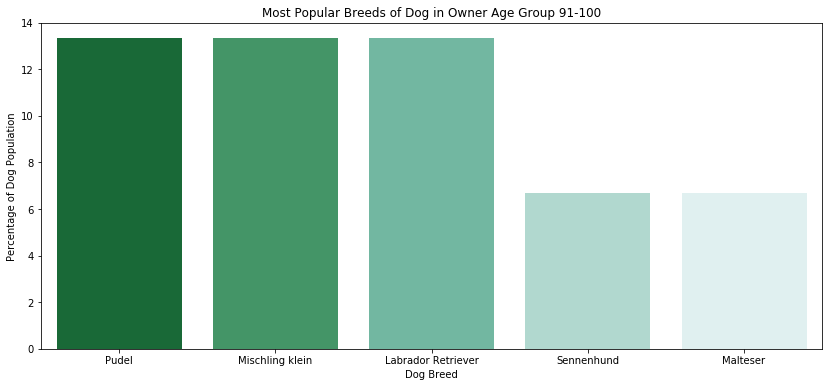

In [16]:
breed_graph(over91, hundred)

In [17]:
# These findings suggest that a dog most suited for someone in the 21-30 age group would be an 8 year-old Chihuahua
# and the best suited dog for someone in the 91-100 age group would be a 3-4 year old Labrador Retriever